In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from konlpy.tag import Okt
from collections import Counter
import pytagcloud
from IPython.display import Image
import re

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.

In [3]:
df = pd.read_csv('son.csv')
df

,title,description
0,"한국축구 캡틴 <b>손흥민</b>, 생수 '마신다'에서 만난다",주장 <b>손흥민</b> 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페셜 패키지를 ...
1,"동아오츠카 생수 '마신다', <b>손흥민</b> 담은 토트넘 패키지 출시",생수 '마신다'가 <b>손흥민</b> 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페...
2,"햄스트링에 쓰러진 <b>손흥민</b>, 토트넘은 먹구름 잔뜩",<b>손흥민</b>(토트넘)이 중요한 시점에서 부상에 쓰러졌다. 토트넘에 비상이 걸...
3,'햄스트링 부상' <b>손흥민</b> 빈자리를 누가 채울까,햄스트링 부상을 당한 <b>손흥민</b>의 빈자리를 메워야 하는 토트넘이다. <b>...
4,"부상 <b>손흥민</b>, 한일전 뛰기 어려울 듯",<b>손흥민</b>(29·토트넘)이 햄스트링 부상으로 당분간 결장할 것으로 예상된다...
...,...,...
995,"<b>손흥민</b>, 팰리스전 선발 출전...개인 최다 타이 리그 14호골 조준 [...",<b>손흥민</b>이 크리스탈 팰리스와 경기에 선발 출전해 리그 14호골을 노린다....
996,英 매체 “<b>손흥민</b>의 크로스는 빅찬스…케인 득점했어야”,토트넘의 정규리그 2연승을 이끈 <b>손흥민</b>(29)이 영국 현지 매체로부터 ...
997,"‘<b>손흥민</b> 자책골 유도’ 토트넘, 풀럼 꺾고 2연승",잉글랜드 프로축구 프리미어리그(EPL) 무대에서 활약 중인 <b>손흥민</b>(29...
998,"'리그 9호 도움 기록' <b>손흥민</b>, C.팰리스전 평점 7.5...최고는 ...",<b>손흥민</b>이 무난한 수준의 평점을 받았다. 토트넘 홋스퍼는 8일 오전 4시...


### 결측치 확인

In [4]:
df.isna().sum()

title          0
description    1
dtype: int64

In [5]:
# 결측치 제거
df.dropna(inplace=True)

df.isna().sum()

title          0
description    0
dtype: int64

### 한글 정제

In [6]:
# 한글외의 문자는 모두 제거한다.
def text_clearing(text) :
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 한글외의 모든 문자를 길이가 0은 문자열로 변환한다.
    result = hangul.sub('', text)
    
    return result

In [7]:
# 테스트
a1 = df['description'][0]
print(a1)
print('----------------------')
print(text_clearing(a1))

주장 <b>손흥민</b> 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페셜 패키지를 선보인다고 16일 밝혔다. 구단과 공식 라이선스 계약을 통해 제작·공개된 이번 스페셜 패키지는 <b>손흥민</b> 선수와 해리 케인, 개러스 베일, 해리... 
----------------------
주장 손흥민 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페셜 패키지를 선보인다고 일 밝혔다 구단과 공식 라이선스 계약을 통해 제작공개된 이번 스페셜 패키지는 손흥민 선수와 해리 케인 개러스 베일 해리 


In [21]:
# 한글을 정제한다.
df['title'] = df['title'].apply(lambda x : text_clearing(x))
df['description'] = df['description'].apply(lambda x : text_clearing(x))

df

,title,description
0,한국축구 캡틴 손흥민 생수 마신다에서 만난다,주장 손흥민 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페셜 패키지를 선보인다고 일...
1,동아오츠카 생수 마신다 손흥민 담은 토트넘 패키지 출시,생수 마신다가 손흥민 선수가 소속된 프리미어리그 토트넘 홋스퍼 스페셜 패키지를 선보...
2,햄스트링에 쓰러진 손흥민 토트넘은 먹구름 잔뜩,손흥민토트넘이 중요한 시점에서 부상에 쓰러졌다 토트넘에 비상이 걸렸다 손흥민은 일 ...
3,햄스트링 부상 손흥민 빈자리를 누가 채울까,햄스트링 부상을 당한 손흥민의 빈자리를 메워야 하는 토트넘이다 손흥민만큼은 아닐지라...
4,부상 손흥민 한일전 뛰기 어려울 듯,손흥민토트넘이 햄스트링 부상으로 당분간 결장할 것으로 예상된다 일 열리는 한국과 일...
...,...,...
995,손흥민 팰리스전 선발 출전개인 최다 타이 리그 호골 조준 공식발표,손흥민이 크리스탈 팰리스와 경기에 선발 출전해 리그 호골을 노린다 토트넘은 일한국시...
996,매체 손흥민의 크로스는 빅찬스케인 득점했어야,토트넘의 정규리그 연승을 이끈 손흥민이 영국 현지 매체로부터 무난한 평점을 받았다 ...
997,손흥민 자책골 유도 토트넘 풀럼 꺾고 연승,잉글랜드 프로축구 프리미어리그 무대에서 활약 중인 손흥민토트넘이 상대팀의 자책골을 ...
998,리그 호 도움 기록 손흥민 팰리스전 평점 최고는 골 도움 케인,손흥민이 무난한 수준의 평점을 받았다 토트넘 홋스퍼는 일 오전 시 분한국시간 영국 ...


### 형태소 분석

In [22]:
# 말뭉치 생성(모든 문장을 하나로 합치는 작업)
title_corpus = ''.join(df['title'].tolist())
description_corpus = ''.join(df['description'].tolist())

print(title_corpus)
print(description_corpus)

한국축구 캡틴 손흥민 생수 마신다에서 만난다동아오츠카 생수 마신다 손흥민 담은 토트넘 패키지 출시햄스트링에 쓰러진 손흥민 토트넘은 먹구름 잔뜩햄스트링 부상 손흥민 빈자리를 누가 채울까부상 손흥민 한일전 뛰기 어려울 듯손흥민 부상으로 기회받을 토트넘 공격수 풋볼런던벤투호 한일전 인 명단 발표부상 손흥민 포함강행군 속 또 허벅지 잡고 쓰러진 손흥민축구대표팀 손흥민 포함 한일전 소집 명단 발표손흥민 혹사가 부른 부상분 두 번째로 긴 출전시간허벅지 부상 손흥민 일 축구 한일전 명단에 포함벤투 부상 손흥민 발탁검사 후 최종 결정손흥민 차출에 대한 토트넘 반응 신문 놀랄만한 일은 아냐허벅지 부상 손흥민 한일전 명단 포함황의조이재성 등 제외햄스트링 부여잡은 손흥민 예견된 부상이었나벤투 감독 한일전 명단 발표손흥민 전격 발탁토트넘 햄스트링 다친 손흥민의 공백 메우는 것은 불가능부상손흥민한일전 명 명단 포함정우영 최초 발탁혹사 손흥민 허벅지 부상부상 교체 손흥민 한일전 매치 명단 포함네티즌 맹비난다친 손흥민 왜 뽑았나 벤투호한일전 명단 가지 포인트손흥민의 햄스트링 부상 토트넘 악몽의 시작 스카이스포츠언론 토트넘 손흥민 대체 선수 찾는 것은 불가능벤투 일 한일전에 허벅지 부상 손흥민 등 명 발탁손흥민 한일전 뛴다황희찬이강인 등 최정예 소집절박한 벤투호한일전 명단에 부상 손흥민 포함리그서만 분 소화한 손흥민 너무 많이 뛰었다현지도 혹사 지적일 축구 한일전 대표팀 명단 발표허벅지 부상 손흥민도 포함일문일답벤투 감독 손흥민 부상 결과보고 최종 합류 결정 언론 토트넘 여러 옵션 있어도 손흥민은 대체 불가손흥민 부상 순간 무리뉴도 현지 언론들도 경악벤투 감독 손흥민 합류 여부 결정하지 못했다동아오츠카 생수 마신다 손흥민 토트넘 패키지 출시우린 끝났어 손흥민 쓰러지자 좌절한 토트넘 팬들부상 손흥민 일 한일전 뛸 수 있을까벤투호 명 명단 발표손흥민 부상토트넘벤투호 초비상언론 손흥민 대체는 거의 불가능손흥민이 쓰러졌다 부상 회복 얼마 걸릴지 몰라손흥민도 황희찬도 없으면 어떡해 한일전 앞둔 벤

In [10]:
# 형태소 분석
tagger = Okt()

title_nouns = tagger.nouns(title_corpus)
description_nouns = tagger.nouns(description_corpus)

print(title_nouns)
print('---------')
print(description_nouns)

['한국', '축구', '캡틴', '손흥민', '생수', '동아오츠카', '생수', '손흥민', '토트넘', '패키지', '출시햄스트링', '손흥민', '토트넘', '먹구름', '잔뜩', '햄', '스트', '링', '부상', '손흥민', '빈자리', '누가', '부상', '손흥민', '한일전', '듯', '손흥민', '부상', '기회', '토트넘', '공격수', '풋볼', '런던', '투호', '한일전', '인', '명단', '발표', '부상', '손흥민', '포함', '강행', '속', '또', '허벅지', '잡고', '손흥민', '축구', '대표팀', '손흥민', '포함', '한일전', '소집', '명단', '발표', '손흥민', '혹사', '부상', '두', '번', '출전', '시간', '허벅지', '부상', '손흥민', '일', '축구', '한일전', '명단', '포함', '투', '부상', '손흥민', '발탁', '검사', '후', '최종', '결정', '손흥민', '차출', '대한', '토트넘', '반응', '신문', '일', '허벅지', '부상', '손흥민', '한일전', '명단', '포함', '황의조', '이재성', '등', '제외', '햄', '스트', '링', '손흥민', '예견', '부상', '투', '감독', '한일전', '명단', '발표', '손흥민', '전격', '발탁', '토트넘', '햄스트링', '손흥민', '공백', '것', '불가능', '부상', '손흥민', '한일전', '명', '명단', '포함', '정우영', '최초', '발탁', '혹사', '손흥민', '허벅지', '부상', '부상', '교체', '손흥민', '한일전', '매치', '명단', '포함', '네티즌', '맹', '비난', '손흥민', '왜', '투호', '한일전', '명단', '가지', '포인트', '손흥민', '햄스트링', '부상', '토트넘', '악몽', '시작', '스카이스포츠', '언론', '토트넘', '손흥민', '대체', '선수', '것', '불가

In [11]:
# 단어들의 빈도수를 구한다.
title_count = Counter(title_nouns)
description_count = Counter(description_nouns)

print(title_count)
print(description_count)

Counter({'손흥민': 1001, '토트넘': 324, '부상': 272, '케인': 198, '한일전': 139, '골': 127, '아스널': 77, '합작': 77, '분': 71, '도움': 63, '전': 60, '투': 55, '명단': 54, '런던': 52, '최': 51, '리그': 50, '교체': 49, '역전패': 49, '투호': 48, '북': 47, '시즌': 47, '감독': 46, '연승': 46, '자그레브': 45, '무리뉴': 44, '더비': 44, '위': 44, '자책골': 44, '베일': 42, '평점': 41, '출전': 40, '포함': 38, '점': 38, '승리': 38, '햄스트링': 37, '호': 37, '선발': 36, '안철수': 36, '풀럼': 36, '발표': 35, '년': 35, '매체': 35, '강': 35, '유도': 35, '일': 34, '단일': 33, '선수': 32, '혹사': 31, '허벅지': 30, '발탁': 30, '유로파리그': 30, '최고': 29, '관계': 28, '팰리스': 28, '소집': 27, '결과': 27, '아웃': 27, '축구': 26, '팬': 26, '아스날': 26, '경기': 25, '전반': 24, '라멜라': 24, '기록': 24, '패키지': 23, '햄': 23, '스트': 23, '링': 23, '황희': 23, '팀': 23, '힘': 23, '생수': 22, '대표팀': 22, '등': 22, '명': 21, '찬': 21, '국민': 21, '차출': 20, '크로스': 20, '출시': 19, '회복': 19, '언론': 18, '합류': 18, '득점': 18, '멀티골': 18, '결정': 17, '것': 17, '비상': 16, '상대': 16, '오세훈': 16, '퇴장': 16, '수': 15, '침묵': 15, '역사': 15, '신기록': 15, '이강인': 14, '모리뉴': 14, '도전': 14,

### 키워드 다듬기
- 한글자인 데이터 삭제
- 불용어 데이터 삭제

In [12]:
# 한글자를 제외한 나머지를 새롭게 담아준다.
title_dict = {}
for key in title_count :
    if len(key) > 1 :
        title_dict[key] = title_count[key]
        
description_dict = {}
for key in description_count :
    if len(key) > 1 :
        description_dict[key] = description_count[key]
        
remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

In [13]:
# 불용어를 읽어온다.
with open('data10/korean_stopwords.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

stopwords = [x.strip() for x in stopwords]
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [14]:
# 불용어를 제외한 나머지만 담아준다.
title_dict = {}
for key in remove_title_count :
    if key not in stopwords :
        title_dict[key] = remove_title_count[key]
        
description_dict = {}
for key in remove_description_count :
    if key not in stopwords :
        description_dict[key] = remove_description_count[key]

remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

In [15]:
# 손흥민 제거
del remove_title_count['손흥민']
del remove_description_count['손흥민']

In [16]:
print(remove_title_count)
print('-----------------')
print(remove_description_count)

Counter({'토트넘': 324, '부상': 272, '케인': 198, '한일전': 139, '아스널': 77, '합작': 77, '도움': 63, '명단': 54, '런던': 52, '리그': 50, '교체': 49, '역전패': 49, '투호': 48, '시즌': 47, '감독': 46, '연승': 46, '자그레브': 45, '무리뉴': 44, '더비': 44, '자책골': 44, '베일': 42, '평점': 41, '출전': 40, '포함': 38, '승리': 38, '햄스트링': 37, '선발': 36, '안철수': 36, '풀럼': 36, '발표': 35, '매체': 35, '유도': 35, '단일': 33, '선수': 32, '혹사': 31, '허벅지': 30, '발탁': 30, '유로파리그': 30, '최고': 29, '관계': 28, '팰리스': 28, '소집': 27, '결과': 27, '아웃': 27, '축구': 26, '아스날': 26, '경기': 25, '전반': 24, '라멜라': 24, '기록': 24, '패키지': 23, '스트': 23, '황희': 23, '생수': 22, '대표팀': 22, '국민': 21, '차출': 20, '크로스': 20, '출시': 19, '회복': 19, '언론': 18, '합류': 18, '득점': 18, '멀티골': 18, '결정': 17, '비상': 16, '상대': 16, '오세훈': 16, '퇴장': 16, '침묵': 15, '역사': 15, '신기록': 15, '이강인': 14, '모리뉴': 14, '도전': 14, '공격': 14, '동아오츠카': 13, '검사': 13, '종합': 13, '출격': 13, '호골': 13, '활약': 13, '악재': 12, '가장': 12, '라인업': 12, '세리머니': 12, '매치': 11, '역대': 11, '국민의당': 11, '유로파': 11, '환상': 11, '듀오': 11, '콤비': 11, '구영회': 11, '제외': 10, '

### 워드 클라우드로 시각화

In [17]:
# title에서 빈도수가 많은 100개의 단어를 추출한다.
rank_title_tags = remove_title_count.most_common(100)
# 워드 클라우드를 위한 단어사전을 생성한다.
title_taglist = pytagcloud.make_tags(rank_title_tags)
# 워드 클라우드 이미지를 생성한다.
pytagcloud.create_tag_image(title_taglist, 'son_title.jpg', size=(900, 600),
                            fontname='NanumGothic', rectangular=False)

In [18]:
# description에서 빈도수가 많은 100개의 단어를 추출한다.
rank_description_tags = remove_description_count.most_common(100)
# 워드 클라우드를 위한 단어 사전을 생성한다.
description_taglist = pytagcloud.make_tags(rank_description_tags)
# 워드 클라우드 이미지를 생성한다.
pytagcloud.create_tag_image(description_taglist, 'son_description.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)

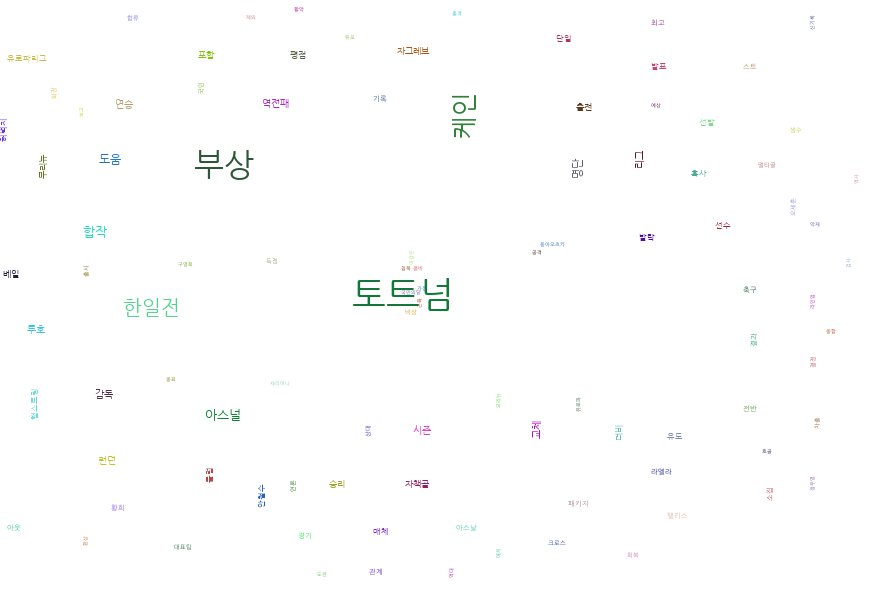

In [19]:
Image(filename='son_title.jpg')

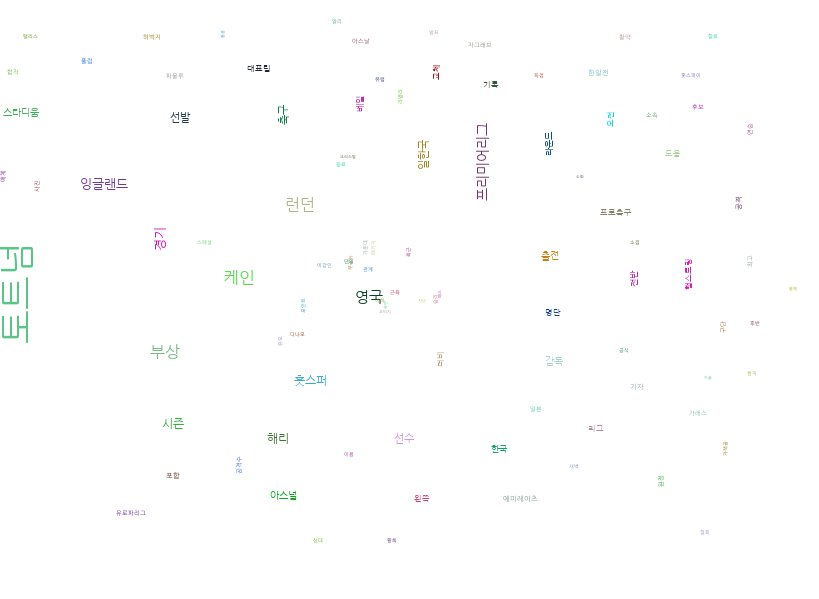

In [20]:
Image(filename='son_description.jpg')